<a href="https://colab.research.google.com/github/alouwyck/maxsypy/blob/main/seminaries/UM6P_jan_2025/Day2/Part_1_Pandas_and_NumPy_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

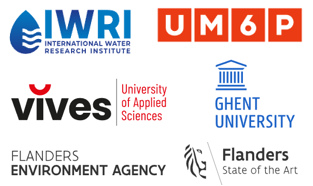<br>


**Mathematical Models and Artificial Intelligence**<br>
**for Solving Groundwater Flow Problems**<br>
Workshop organized by the<br>
International Water Research Institute (IWRI)<br>
University Mohammed VI Polytechnic<br>
January 6-7, 2025<br>
Dr. Andy Louwyck

---



<font size="6"><strong>DAY 2 - Artificial Intelligence</strong></font>

---
---

# **Part 1 - Getting Started with Pandas and NumPy**

In this notebook, we will explore the fundamental tools for data manipulation and numerical operations in Python. Pandas and NumPy are essential libraries that form the backbone of data analysis and machine learning workflows.

Before diving into machine learning with scikit-learn and deep learning with Keras in subsequent notebooks, we'll start by mastering the basics of Pandas and NumPy. This foundation will enable you to efficiently handle and preprocess data, setting you up for success in more advanced topics.

Let's get started!

## **0. Import Statements**

As this is an introduction to Pandas and NumPy, we first need to import these libraries. And we also need Matplotlib:

- [NumPy](https://numpy.org/): library for numerical computation.
- [Pandas](https://pandas.pydata.org/): library for analyzing structured data
- [Matplotlib](https://matplotlib.org/): library for visualizing data

We import these libraries using the `import` command. It is customary to give NumPy alias `np` and Pandas alias `pd`. From Matplotlib, we need the `pyplot` module; the convention is to import it as `plt`.

In [1]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations

## **1. Pandas: Managing Dataframes**

Before starting with machine learning, we need to obtain some basic skills in handling **structured data**. Machine learning that is not deep learning - often referred to as *shallow learning* - usually deals with this kind of data. They are stored in two-dimensional **tables**, which are found in relational databases, but also in Excel spreadsheets or csv-files. To handle this kind of data, we will use Pandas, a powerful and versatile Python library designed for data manipulation and analysis.

### Pandas Dataframes

The fundamental data structure in Pandas is a **dataframe**, which is basically a two-dimensional table. A dataframe can be created using the `DataFrame` constructor:

In [2]:
data = dict(
    day=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    temperature=[15, 10, 12, 18, 16, 11, 17],  # in degrees Celcius
    rain=[3.1, 0.0, 0.2, 2.1, 1.0, 0.0, np.nan],  # in mm
    wind=['strong', 'mild', 'mild', 'mild', 'strong', 'mild', pd.NA]
)

df = pd.DataFrame(data)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild
6,Sunday,17,NaN,<NA>


Checking the data type of `df`, we see it is a `DataFrame` indeed:

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


The `NaN` value stands for "not-a-number" and the `NA` value for "not available". When dealing with large datasets, one may use method `isna` to check if there are missing values:

In [4]:
np.any(df.isna())  # np.any returns true if at least one element is True

True

The `info` method gives an overview:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          7 non-null      object 
 1   temperature  7 non-null      int64  
 2   rain         6 non-null      float64
 3   wind         6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 352.0+ bytes


Note that the columns having 'object' as data type (Dtype) actually contain string objects.

By invoking method `describe`, we get the descriptive statistics of the numerical variables:

In [6]:
df.describe().T  # use .T to transpose the output

,count,mean,std,min,25%,50%,75%,max
temperature,7.0,14.142857,3.132016,10.0,11.50,15.0,16.500,18.0
rain,6.0,1.066667,1.283225,0.0,0.05,0.6,1.825,3.1


We see the `NaN` value is not taken into account. It is also possible to plot these numerical variables:

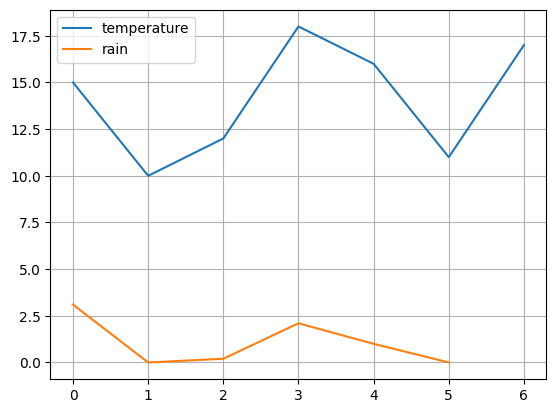

In [7]:
df.plot();
plt.grid();

Selecting a specific column can be done in two ways:

In [8]:
print(df.temperature)
print(df['rain'])

0    15
1    10
2    12
3    18
4    16
5    11
6    17
Name: temperature, dtype: int64
0    3.1
1    0.0
2    0.2
3    2.1
4    1.0
5    0.0
6    NaN
Name: rain, dtype: float64


The result of these operations is not a Pandas dataframe, but a Pandas **series**, which is a 1D data structure:

In [9]:
print(type(df.rain))

<class 'pandas.core.series.Series'>


Pandas provides all kind of methods that can be performed on the data. Some examples:

In [10]:
df.sort_values(by=['rain', 'temperature'])  # sort rows by rain values and then by temperature values

,day,temperature,rain,wind
1,Tuesday,10,0.0,mild
5,Saturday,11,0.0,mild
2,Wednesday,12,0.2,mild
4,Friday,16,1.0,strong
3,Thursday,18,2.1,mild
0,Monday,15,3.1,strong
6,Sunday,17,NaN,<NA>


In [11]:
df.wind.unique()  # unique values in column wind

array(['strong', 'mild', <NA>], dtype=object)

In [12]:
df[['temperature', 'rain']].max(axis=0)  # maximum of columns temperature and rain

,0
temperature,18.0
rain,3.1


In [13]:
df[['temperature', 'rain']].sum(axis=1)  # sum or rows

,0
0,18.1
1,10.0
2,12.2
3,20.1
4,17.0
5,11.0
6,17.0


The missing values are not taken into account here, but they may be an issue when applying machine learning models. One strategy is to replace them by the mean, the median or the mode of a variable. In general, the process of replacing missing data with substituted values is called **imputation**.

Here, we replace the `NaN` value by the mean of the rain values, and the `NA` value by the mode of the wind values, that is the most frequent value. Replacing missing values is straightforward using method `fillna`:

In [14]:
df['wind'] = df['wind'].fillna(df.wind.mode().iloc[0])  # iloc[0] selects the first element
df['rain'] = df['rain'].fillna(df.rain.mean())
df

,day,temperature,rain,wind
0,Monday,15,3.100000,strong
1,Tuesday,10,0.000000,mild
2,Wednesday,12,0.200000,mild
3,Thursday,18,2.100000,mild
4,Friday,16,1.000000,strong
5,Saturday,11,0.000000,mild
6,Sunday,17,1.066667,mild


Another option is to omit the samples containing missing values, which is easy using method `drop`:

In [15]:
df = df.drop(index=6)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild


Using method `drop`, it is also possible to delete a column:

In [16]:
df = df.drop(columns=['day'])
df

,temperature,rain,wind
0,15,3.1,strong
1,10,0.0,mild
2,12,0.2,mild
3,18,2.1,mild
4,16,1.0,strong
5,11,0.0,mild


### Vectorized Expressions

As we've seen in previous code examples, the dataframe methods operate on entire columns or rows, although these methods actually apply to individual entries. This is an interesting property of Pandas dataframes: they allow for **vectorized expressions**, which means that the methods perform element-by-element operations without having to use a loop.

Suppose we want to convert the temperature values in our table from degrees Celsius to degrees Fahrenheit using the following well-known formula:

> `°F = °C * 9 / 5 + 32`

To do so, we don't need to loop over the rows, but we can apply the conversion formula directly to the `'temperature'` column:



In [17]:
df.temperature = df.temperature * 9 / 5 + 32
df

,temperature,rain,wind
0,59.0,3.1,strong
1,50.0,0.0,mild
2,53.6,0.2,mild
3,64.4,2.1,mild
4,60.8,1.0,strong
5,51.8,0.0,mild


Not only they make our code more readable, but in most cases, it is also computationally more efficient to use vectorized operations instead of loops!

Similar to SQL, it is also possible to apply the `groupby` method, for instance, to calculate the mean temperature for different wind categories:

In [18]:
df[['temperature', 'wind']].groupby(by='wind').mean()

,temperature
wind,
mild,54.95
strong,59.90


And there are many other advanced functionalities! As already mentioned, Pandas is a very powerful Python library for data analysis that has become a standard tool for data scientists. No wonder it is sometimes called Excel on steroids...

So, that concludes our Pandas 101. We're now prepared to delve into the application of machine learning algorithms to structured data! But first, we were introduced to NumPy.

## **2. NumPy: Working with Numerical Arrays**

Before diving into deep learning, we need to first say something about **tensors**, because tensors play a fundamental role as the building blocks for data representation and manipulation in deep learning. Tensors are **multi-dimensional arrays** that extend the concept of scalars, vectors, and matrices to higher dimensions. They are the backbone of various deep learning frameworks, including TensorFlow and PyTorch. These data structures are very efficient for specific mathematical operations called **tensor operations**. Understanding tensors is crucial for anyone venturing into the field of deep learning, as they are at the core of data storage and computation in neural networks. Here, we explore tensors and their operations through NumPy.

### NumPy Arrays

In NumPy, tensors are represented as `ndarray` objects, which stands for **n-dimensional array**. We can simply create a NumPy array by passing a list to `np.array`:

In [19]:
a = np.array([1, 2, 3])
print(a)
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


A NumPy array is characterized by the following **attributes**:
- `ndim`: integer indicating the number of dimensions or axes, also called the *rank* of the array;
- `shape`: tuple containing the number of elements in each dimension or along each axis;
- `size`: integer indicating the total number of elements;
- `dtype`: the data type of the elements.

In [20]:
print("ndim:", a.ndim)
print("shape:", a.shape)
print("size:", a.size)
print("dtype:", a.dtype)

ndim: 1
shape: (3,)
size: 3
dtype: int64


As we see, array `a` is one-dimensional and has three 64-bit integer elements. A one-dimensional array is called a **vector**. How do we create a two-dimensional array, called a **matrix**?

In [21]:
M = np.array([[1, 2, 3],   # row 1
              [4, 5, 6]],  # row 2
             dtype=float)  # dtype
print(M)

[[1. 2. 3.]
 [4. 5. 6.]]


We simply pass a list of lists to `np.array`, where each sublist represents a row in the matrix. By passing a `dtype` argument, we may define the datatype of the elements. Here, the elements would be integers by default, but by setting `dtype` to `float`, they are converted to double-precision floating point numbers:

In [22]:
print("ndim:", M.ndim)
print("shape:", M.shape)
print("size:", M.size)
print("dtype:", M.dtype)

ndim: 2
shape: (2, 3)
size: 6
dtype: float64


We see matrix `M` indeed has two dimensions or axes, and the `shape` attribute indicates how many elements each dimension has. The convention is that the number of rows is the first axis, whereas the number of columns is the second axis. So in case of a 2D matrix the shape attribute is `(nrow, ncol)`.

Can we have arrays with zero dimensions? Yes! They are called **scalars** as they contain one element only:

In [23]:
s = np.array(np.pi)
print("scalar s:", s)
print("ndim:", s.ndim)
print("shape:", s.shape)
print("size:", s.size)
print("dtype:", s.dtype)

scalar s: 3.141592653589793
ndim: 0
shape: ()
size: 1
dtype: float64


We see that `ndim` is `0` indeed, and consequently, `shape` is an empty tuple! There is, however, one element in `s`, which is indicated by `size`.

And how about multi-dimensional arrays? Well, they are created by passing nested lists to `np.array`:

In [24]:
N = np.array([
              # first matrix
              [[1, 2, 3],   # row 1
               [4, 5, 6]],  # row 2
              # second matrix
              [[7, 8, 9],   # row 1
               [0, 0, 0]]   # row 2
              ])
print(N)

[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 0 0]]]


Array `N` is three-dimensional:

In [25]:
print("ndim:", N.ndim)
print("shape:", N.shape)
print("size:", N.size)
print("dtype:", N.dtype)

ndim: 3
shape: (2, 2, 3)
size: 12
dtype: int64


If we look at the `shape` attribute, we see we have created two matrices of two rows and three columns indeed! The figure below shows how n-dimensional arrays and their axes should be visualized:

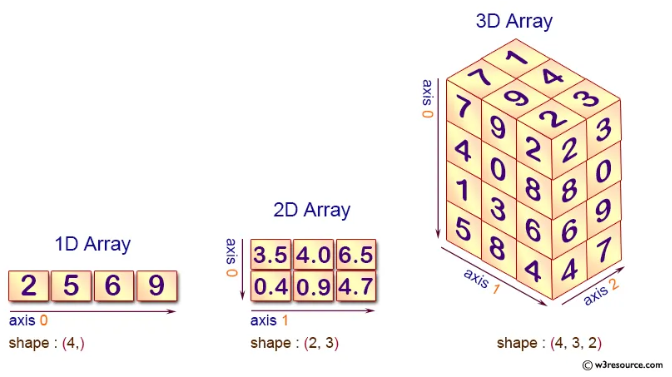

Typing all the elements and puting them into nested lists each time we want to create an array can be cumbersome. Fortunately, NumPy provides functions to create **special arrays**:

In [26]:
Z = np.zeros((2, 2, 3))     # all zeros
O = np.ones((4, 5))         # all ones
I = np.eye(3)               # identity matrix
D = np.diag([1, 3, 5])      # diagonal matrix
R = np.random.rand(3, 4)    # random matrix

for a in [Z, O, I, D, R]:
    print(a)
    print()

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0]
 [0 3 0]
 [0 0 5]]

[[0.32014303 0.34718442 0.26876641 0.99693131]
 [0.47171588 0.34133577 0.98044393 0.55844842]
 [0.48283201 0.56958391 0.98900892 0.73061981]]



**Selecting array elements** can be done in the same way elements are retrieved from (nested) lists:

In [27]:
R[0][1]  # first row, second column

0.3471844241824831

But there is more convenient way that gives the same result:

In [28]:
R[0, 1]

0.3471844241824831

And of course, we may select more than one element or subarrays from an array:

In [29]:
R[-1, :]  # last row

array([0.48283201, 0.56958391, 0.98900892, 0.73061981])

In [30]:
R[:, 0]  # first column

array([0.32014303, 0.47171588, 0.48283201])

In [31]:
R[1:, 1:-1]  # all rows except for the first, and all columns except for the first and the last

array([[0.34133577, 0.98044393],
       [0.56958391, 0.98900892]])

### Vectorized Expressions

So far, NumPy arrays seem to have no real additional benifits as they are nothing more than nested lists. However, working with NumPy arrays is very powerful as they allow for **vectorized expressions**. These expressions make it possible to perform element-wise operations on entire arrays or matrices, eliminating the need for explicit loops. They take advantage of NumPy's optimized C-based backend to efficiently perform operations on large datasets. When you apply a function or operation to a NumPy array, it automatically applies the operation to each element of the array, resulting in a new array with the same shape. This makes it both more concise and computationally efficient compared to traditional iterative operations. Let's illustrate this with an example:

In [32]:
from time import time  # we need this to time the calculations

# a very large matrix containing one million elements equal to 1
X = np.ones((1000, 1000))

# now we want to multiply each element by 2
start = time()
for irow in range(X.shape[0]):
    for icol in range(X.shape[1]):
        X[irow, icol] *= 2
print('loop:', time() - start, 'sec')

# the vectorized expression without loop
X = np.ones((1000, 1000))
start = time()
X *= 2
print('vectorized:', time() - start, 'sec')

loop: 0.872746467590332 sec
vectorized: 0.0010285377502441406 sec


We see the vectorized expression is almost 100 times faster! So all *elementary arithmetic operations* are vectorized in NumPy, which may be useful in the creation of special arrays:

In [33]:
n = 3
A = 10 * np.ones((n, n))      # 3x3 matrix with constant elements equal to 10
B = 2 * np.random.rand(n, n)  # 3x3 matrix with numbers between 0 and 2
C = 5 * np.eye(n)             # 3x3 diagonal matrix with nonzero element equal to 5

print(A)
print("\n+\n")
print(B)
print("\n+\n")
print(C)
print("\n=\n")
print(A + B + C)

[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]

+

[[1.20957913 0.15705571 0.13883778]
 [1.07445325 1.99331412 0.3737607 ]
 [0.32603572 0.51547214 1.44582307]]

+

[[5. 0. 0.]
 [0. 5. 0.]
 [0. 0. 5.]]

=

[[16.20957913 10.15705571 10.13883778]
 [11.07445325 16.99331412 10.3737607 ]
 [10.32603572 10.51547214 16.44582307]]


We see that it is also possible to sum arrays of the same shape. If we use the `*` operator for multiplication, then NumPy performs element-by-element multiplication:

In [34]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[10, 10, 10],
              [20, 20, 20]])
print(A)
print('\n*\n')
print(B)
print('\n=\n')
print(A * B)  # element-by-element multiplication

[[1 2 3]
 [4 5 6]]

*

[[10 10 10]
 [20 20 20]]

=

[[ 10  20  30]
 [ 80 100 120]]


As we know, there is also [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)! In NumPy this can be performed by applying function `dot`:

In [35]:
np.dot(A, B.T)

array([[ 60, 120],
       [150, 300]])

Recall that the number of columns in `A` must be equal to the number of rows in `B`, which is why we have transposed the second matrix, or `B.T`. As the shape of matrix `A` is 2x3, and the shape of the transpose of matrix `B` is 3x2, the resulting matrix has shape 2x2. If we transpose matrix `A` instead of matrix `B`, we get a 3x3 matrix as result:

In [36]:
np.dot(A.T, B)

array([[ 90,  90,  90],
       [120, 120, 120],
       [150, 150, 150]])

*Mathematical functions* available in NumPy are also vectorized:

In [37]:
v = np.array([10, 100, 1000, 10_000, 100_000])
np.log10(v)

array([1., 2., 3., 4., 5.])

In [38]:
x = np.pi / 4 * np.arange(7)  # numpy equivalent of range
np.sin(x)

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

It may be useful in some cases to **reshape arrays** using functions or methods `flatten`, `squeeze` or `reshape`:

In [39]:
A = np.array([range(4), range(4), range(4)])  # 3x4 matrix
A.flatten()  # flatten the array to 1D vector

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [40]:
A.reshape((2, 6))  # reshape to 2x6 matrix

array([[0, 1, 2, 3, 0, 1],
       [2, 3, 0, 1, 2, 3]])

In [41]:
v = np.arange(1, 6)  # 1D vector
print(v)
print()
c = v[:, np.newaxis]  # add extra dimension
print(c)
print()
print(c.squeeze())  # squeeze c = omit singleton dimensions

[1 2 3 4 5]

[[1]
 [2]
 [3]
 [4]
 [5]]

[1 2 3 4 5]


Finally, we briefly discuss **broadcasting** in NumPy. It is a mechanism that allows arrays with different shapes to be combined or operated upon together, even if their shapes don't match exactly. NumPy automatically adjusts the dimensions of the smaller array to make the operation possible, making it more convenient and efficient for element-wise operations on arrays of different shapes. Actually, we've already encountered broadcasting when we added a number to an array or multiplied an array by a number. But broadcasting also applies to matrices:

In [42]:
A = np.array([np.zeros(3),
              10 * np.ones(3),
              20 * np.ones(3),
              30 * np.ones(3)])  # 4x3 matrix
b = np.arange(1, 4)  # 3 element vector
print(A)
print('\n+\n')
print(b)
print('\n=\n')
print(A + b)  # outcome is also 4x3

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]

+

[1 2 3]

=

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


We see that vector `b`, which contains 3 elements, is broadcasted to a 4x3 matrix so it can be added to matrix `A`. It is as if vector `b` is 'stretched' by 'repeating' it 4 times:

In [43]:
np.tile(b, (4, 1))  # 4x 'repeating' vector b along the row axis

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

The figure below visualizes very clearly what happens:

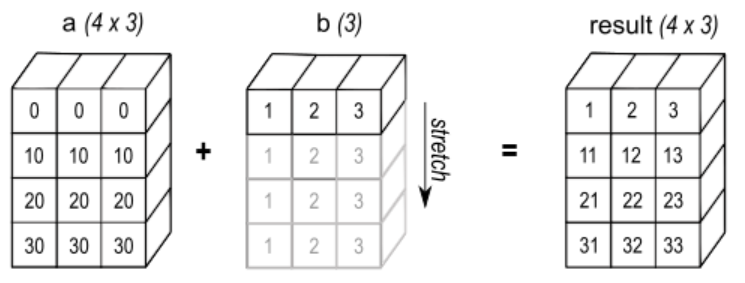

Obviously, broadcasting is only possible if the shapes of the arrays that are involved are compatible. If vector `b` has 4 elements, then the broadcasting does not work, and a `ValueError` is thrown!

In [44]:
A = np.ones((3, 2))  # 3x2 matrix
b = np.ones(4)  # 4 element vector
try:
    print(A + b)
except ValueError as error:
    print(error)

operands could not be broadcast together with shapes (3,2) (4,) 


Ok, so far this crash course in NumPy. We are ready now to dive into Keras!

---